<a href="https://colab.research.google.com/github/A-Nafissi/Custom-NLP-pipeline/blob/main/Youtube_Tutorial_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This Youtube video 👉 https://youtu.be/YBqk9RPrg1Y captures my journey, as a Computational linguist and ex-translator, to building this custom Natural Language Processing pipeline for sentiment analysis from social media text data👇. 
A pipeline that converts emojis to text with semantic values, cleans the data from any noise without compromising the semantic or the syntax, parses urls and extract domain from them...
The pipeline was coded in way that can be customized and adapted to any, if not all, use cases that deals with text data without any complexities.


pip installs ⬇️

In [1]:
!pip install googletrans==3.1.0a0
!pip install -U spacy
!python -m spacy download en_core_web_lg
!pip install emoji
!pip install better_profanity
!pip install -U textblob
!python -m textblob.download_corpora
!pip install wordcloud

  Using cached googletrans-3.1.0a0.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached httpx-0.13.3-py3-none-any.whl (55 kB)
  Using cached httpcore-0.9.1-py3-none-any.whl (42 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
     ---------------------------------------- 1.2/1.2 MB 7.6 MB/s eta 0:00:00
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
  Using cached rfc3986-1.5.0-py2.py3-none-any.whl (31 kB)
  Using cached h11-0.9.0-py2.py3-none-any.whl (53 kB)
  Using cached h2-3.2.0-py2.py3-none-any.whl (65 kB)
  Using cached hyperframe-5.2.0-py2.py3-none-any.whl (12 kB)
  Using cached hpack-3.0.0-py2.py3-none-any.whl (38 kB)
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16417 sha256=4661aa44240922ba477aaf1a633323edb75296f493f97b43a118349ade0d6359
  Stored in directory: c:\users\nafis\appdata\local\pip\cache\wheels\e1\a1\42\8f744c366846e6c1ea9efe22932


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     --------------------------------------- 12.2/12.2 MB 15.2 MB/s eta 0:00:00
     -------------------------------------- 434.4/434.4 kB 9.0 MB/s eta 0:00:00
     ------------------------------------- 483.8/483.8 kB 10.3 MB/s eta 0:00:00
     ---------------------------------------- 50.3/50.3 kB ? eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 13.5 MB/s eta 0:00:00
     ---------------------------------------- 122.7/122.7 kB ? eta 0:00:00
     ---------------------------------------- 47.3/47.3 kB ? eta 0:00:00
     ------------------------------------- 182.0/182.0 kB 11.5 MB/s eta 0:00:00
     ---------------------------------------- 5.4/5.4 MB 13.7 MB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 12.3 MB/s eta 0:00:00
     ---------------------------------------- 6.6/6.6 MB 13.7 MB/s eta 0:00:00
     ------------------------------------- 241.6/241.6 kB 15.4 MB/s eta 0:00:00
     ---------------------------------------- 61.2/61.2 kB 3.4 


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 587.7/587.7 MB 3.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 431.4/431.4 kB 4.5 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 46.1/46.1 kB 2.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 626.3/626.3 kB 5.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\nafis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nafis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nafis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nafis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\nafis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\nafis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


     -------------------------------------- 300.6/300.6 kB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 7.8/7.8 MB 21.7 MB/s eta 0:00:00
     ---------------------------------------- 55.8/55.8 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 17.6 MB/s eta 0:00:00
     -------------------------------------- 211.8/211.8 kB 6.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Packages importation

In [2]:
import pandas as pd
from googletrans import Translator
from urllib.parse import urlparse
import spacy
import emoji
import re
from better_profanity import profanity
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns


c:\Users\nafis\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'seaborn'

Package loading 📦

In [3]:
data = pd.read_csv("youtube_coding.csv", sep="\t")
nlp = spacy.load("en_core_web_lg")

Labo 🔬

In [4]:
text = ("@Ann150000 bootcamp_devops，搞得自己是局外人一样；动不动就得手把手pair-coding；屁事多，今天请假，明天请假….。")
text2 = ("[100%OFF] Filmora 11/X/9: Zero to https://t.co/xzgGhH2q4n #machinelearning #bigdata #analytics #datascience #ai #iot #iiot #python #tensorflow #javascript #reactjs #cloudcomputing #datascientist #linux #programming #coding #100daysofcode")
text3 =("i python and C#, #python  i love love love love  coding which  is gooooooooooooooooodi LIKE DataScience")
text4 = ("Difference of webStorage between localStorage &amp; sessionStorage c# and C# #Blog #Website #webdesign #design #programming #program #code #coding #html #css #javascript #webStorage #life #IT #hacking #tips #news")

In [5]:
data_cleaning(text3)

NameError: name 'data_cleaning' is not defined

In [6]:
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1588256532122042369,1588096383910821890,2022-11-03 14:47:20 Central Daylight Time,2022-11-03,14:47:20,-500,1373934185547710467,boringlogic,Boring Logic,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'GEOLIAM5', 'name': 'GEOLIAM'...",NaN,NaN,NaN,NaN
1,1588256480549277697,1587583430858280960,2022-11-03 14:47:07 Central Daylight Time,2022-11-03,14:47:07,-500,18587971,leidegre,John Leidegren,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'molecularmusing', 'name': 'S...",NaN,NaN,NaN,NaN
2,1588256359597776896,1588256359597776896,2022-11-03 14:46:39 Central Daylight Time,2022-11-03,14:46:39,-500,1381993715879804932,cheesem45226635,Trading Signals,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1588256294531915776,1588256294531915776,2022-11-03 14:46:23 Central Daylight Time,2022-11-03,14:46:23,-500,1040063449315733505,dorayakiblog,dorayaki,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1588256267851550721,1588256267851550721,2022-11-03 14:46:17 Central Daylight Time,2022-11-03,14:46:17,-500,1114308687261261824,damoncroberts,Damon Roberts,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [7]:
data.drop(columns=['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'], inplace=True)

In [8]:
data.sort_values("language", ascending=False)

,tweet,language
468,@Ann150000 而且特爱抱怨，搞得自己是局外人一样；动不动就得手把手pair-codi...,zh
280,@hussien_coding 🫶,und
94,@EnuguGod @morozov_dev Na una handiwork. Ndị c...,tl
378,@coding_jay @istdochechtegal @ChastoEv @danger...,qme
102,@clcoding @SaveToNotion #programming #thread,qme
...,...,...
185,@HerrDela @Leon_Bergmann Beides ist extrem eas...,de
435,@coding_jay @istdochechtegal @ChastoEv @danger...,de
384,@coding_jay @Hippietante11 @istdochechtegal @C...,de
335,https://t.co/HnN8q8ldeb Genetic Algorithms w...,cy


NLP Coding section 🖥️

In [9]:
#-------Custom dictionary for emojis conversion-------------#

my_dict = {
    "❤":"love",
    "❤️":"love",
    "😊":"happy",
    "🥰":"happy and loved",
    "😍":"love it",
    "🙏":"hoping",
    "🤣":"very funny",
    "🥺":"sad",
    "👍":"like it"
}

In [10]:
def to_english(data):
  translator = Translator()
  data = translator.translate(data, dest="en")
  return data.text

In [11]:
def url_parsing(data):
  data = re.sub(r"\shttp\S+", "", data)

#-----------get the domain----------------#
  # tokenized_data = [token.text for token in nlp(data)]
  # parsed_data = [urlparse(token)[1] if token.startswith("http") else token for token in tokenized_data]
  # data = " ".join(parsed_data)
  
  return data 

In [12]:
def emoji_to_text(data):
  tokenized_data = [token.text for token in nlp(data)]
  custom_text = [my_dict[token] if token in my_dict else emoji.demojize(token) for token in tokenized_data]
  data = " ".join(custom_text)
  return data


In [13]:
def data_cleaning(data):
  data = re.sub(r"@[A-Za-z0-9-_]+", "User", data)  #------to replace @name by User
  data = re.sub("_|-", " ", data)                  #------to remove underscores and dashes
  data = re.sub(r"[^#%'.,+&A-Za-z0-9]", " ", data) #------to remove some non-alphanumeric characters
  data = re.sub(r"(?<!C)#", "", data, flags=re.I)  #------to exclude the preceeded by C
  data = re.sub("'r|\sr\s", " are ", data)         #------to normalize the "are"
  data = re.sub(r"(.)\1+", r"\1\1", data, flags=re.I)#----to remove repeated letters
  data = re.sub(r"(?<![A-Z])(?=[A-Z])", " ", data) #------to convert CamelCase to normal case
  data = re.sub(r"\s(\w+)\s\1+", r" \1", data, flags=re.I).lower()#-to remove repeated words
  data = re.sub(r"\s+", " ", data)                 #------to remove any extra space
  data = re.sub(r"\s?(i)\s", " I ", data).lstrip() #------to replace "i" with "I"
#------------profanity filter----------------#
  profanity.load_censor_words()
  data = profanity.censor(data)

  return data


In [14]:
def sentiment_analysis(data):
  data = TextBlob(data)
  data = data.sentiment.polarity
  if data == 0:
    return "Neutral"
  elif data < 0:
    return "Negative"
  else:
    return "Positive"


In [15]:
def word_cloud(data):

  text = data

  x, y = np.ogrid[:300, :300]

  mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
  mask = 255 * mask.astype(int)


  wc = WordCloud(background_color="white", repeat=True, mask=mask, stopwords=STOPWORDS)
  wc.generate(text)

  plt.axis("off")
  plt.imshow(wc, interpolation="bilinear")
  plt.show()



In [16]:
data["translation"] = data["tweet"].apply(to_english)

In [17]:
data["translation"] = data["translation"].apply(url_parsing)

In [18]:
data["translation"] = data["translation"].apply(emoji_to_text)

In [19]:
data["translation"] = data["translation"].apply(data_cleaning)


In [20]:
data["sentiment"] = data["translation"].apply(sentiment_analysis)

In [21]:
data[["tweet", "language", "sentiment", "translation"]]

,tweet,language,sentiment,translation
0,@GEOLIAM5 @Amooti_Mami Are you interested in l...,en,Positive,user user are you interested in learning any t...
1,@molecularmusing Currently doing some - not ve...,en,Negative,user currently doing some not very hot coding ...
2,Replace paper forms with̗ a mobile app. No co...,en,Positive,replace paper forms with a mobile app . no cod...
3,Difference of webStorage between localStorage ...,en,Neutral,difference of web storage between local storag...
4,I’m coding why do you ask? https://t.co/W8e0Z...,en,Neutral,I m coding why do you ask
...,...,...,...,...
505,I have only messed around with programming bef...,en,Negative,I have only messed around with programming bef...
506,First ever pencil and paper coding exam was a ...,en,Positive,first ever pencil and paper coding exam was a ...
507,U think Jamie Dimon or Frank Carone or Jabari ...,en,Neutral,u think jamie dimon or frank carone or jabar I...
508,I think the difference between data scientist ...,en,Positive,I think the difference between data scientist ...


Data Visualization 📊

In [22]:
all_tweets = " ".join([tweet for tweet in data.translation])

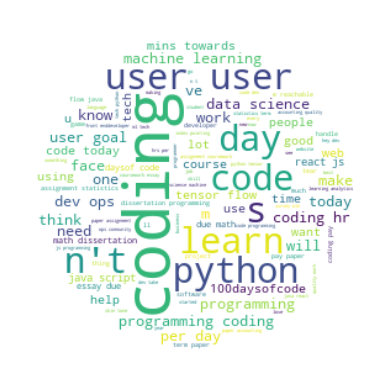

In [23]:
word_cloud(all_tweets)

In [24]:
#------------Run this sell for a quick visualization of the sentiment distribution------#
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data= data)

NameError: name 'sns' is not defined

<Figure size 500x500 with 0 Axes>

Debrief 🤝



*   What worked well?
*   What did you learn from my tutorial?
*   Did you manage to customize it for your own use case?








